# 도로 상황 분류 프로젝트

### 데이터 전처리2: 도로 노면 부분 자르기

#### 1) Youtube 영상 이미지 데이터 (도로 부분만 crop)

* youtube 이미지 확인

c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


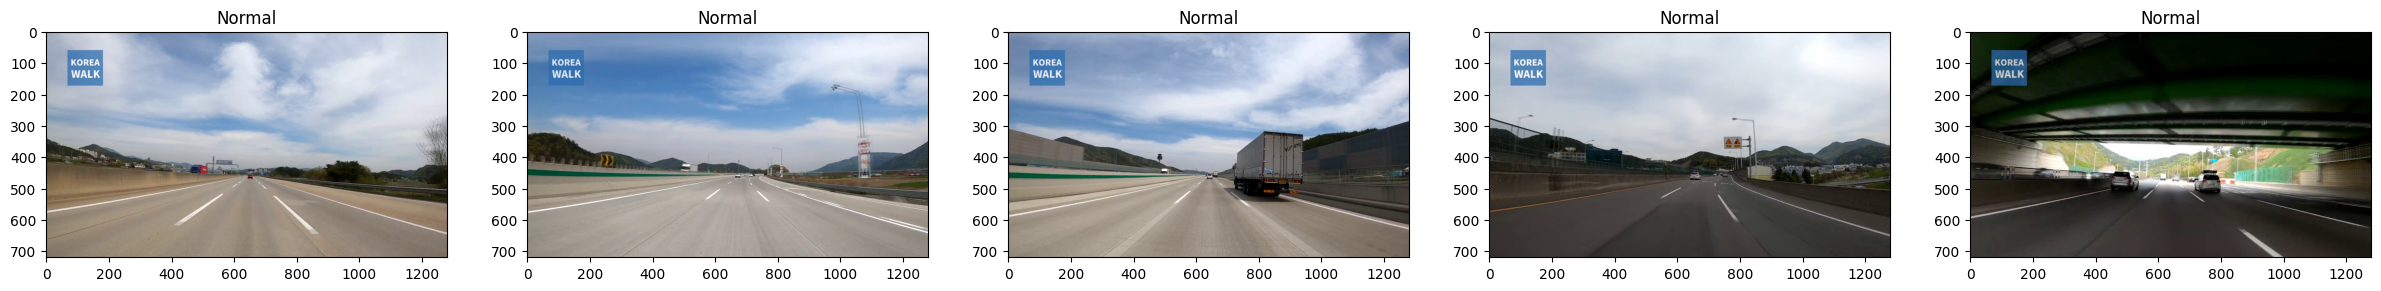

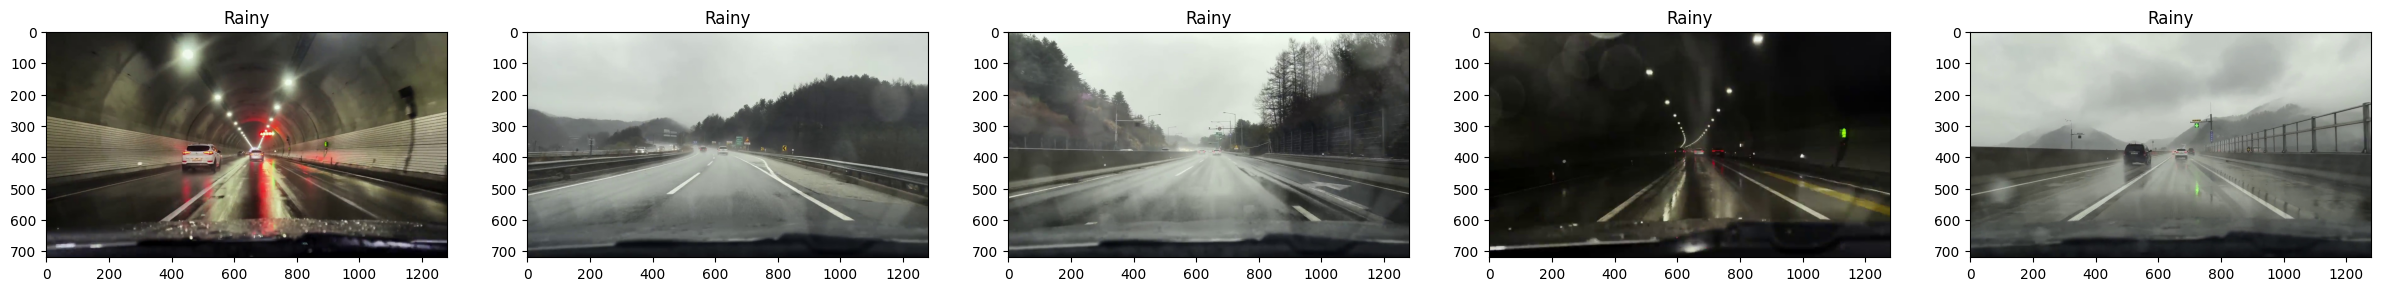

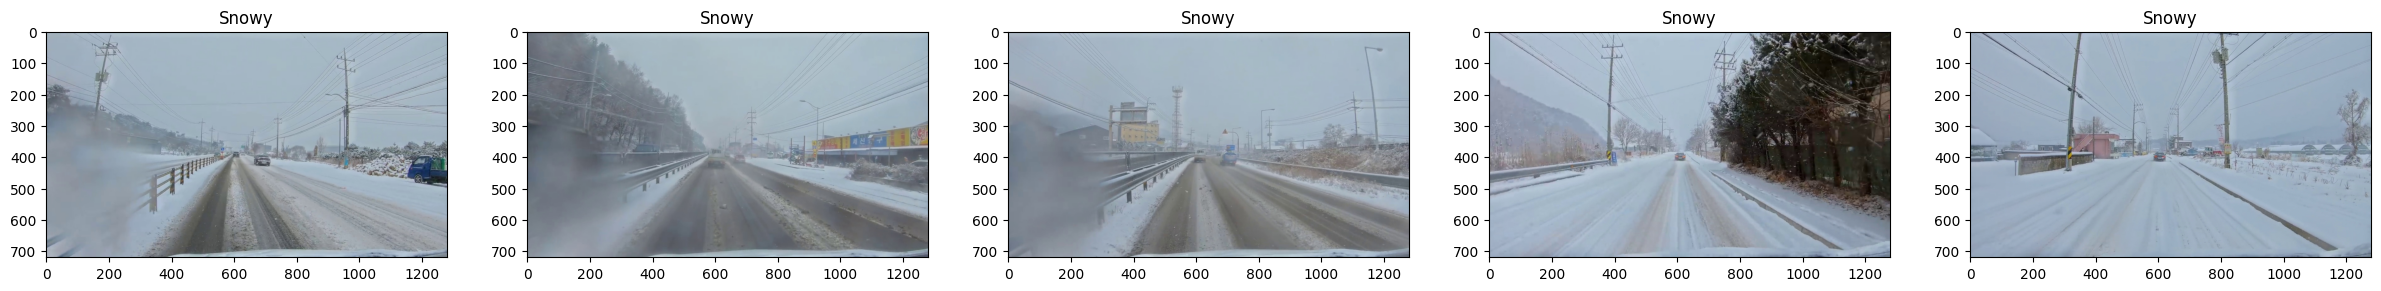

In [1]:
import torch
import torchvision
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

youtube_images_path = 'D://Weather conditions driving classification data (YouTube)//images//'
class_names = ['Normal','Rainy','Snowy']

def img_show_youtube(youtube_images_path,class_names):

    rand_idx = np.random.randint(0,5000,5)
    for class_name in class_names:
        images_jpg = glob(youtube_images_path+class_name+"//*.jpg")
        plt.figure(figsize=(30,30))
        for i,idx in enumerate(rand_idx):
            img = Image.open(images_jpg[idx])
            img = np.array(img)

            plt.subplot(1,5,i+1)
            plt.imshow(img)
            plt.title(class_name)
        plt.show()

img_show_youtube(youtube_images_path,class_names)

* youtube 사진 : trasform - crop 활용하여 height 1/2 정도를 기준으로 잘라 DataLoader에 삽입

#### 2) AI hub 이미지 데이터 (도로 부분만 crop)

In [129]:
AI_hub_images_path = 'D://Weather conditions driving classification data (AI hub)//images//'

class_names = ['Normal','Rainy','Snowy']
# detail_path = '//Day//Front//'

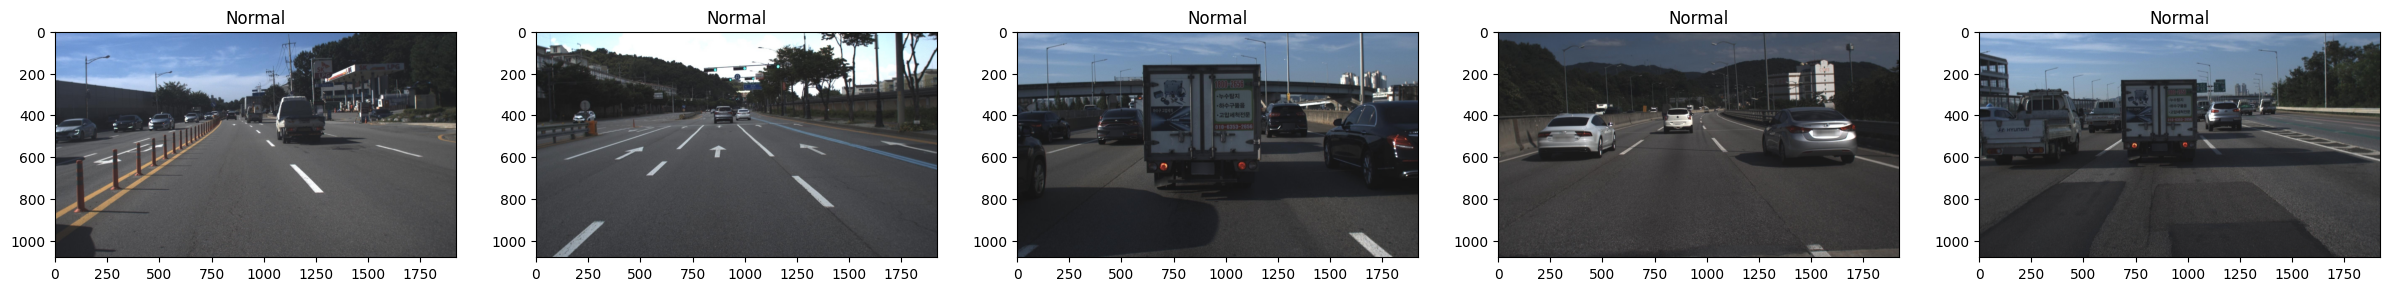

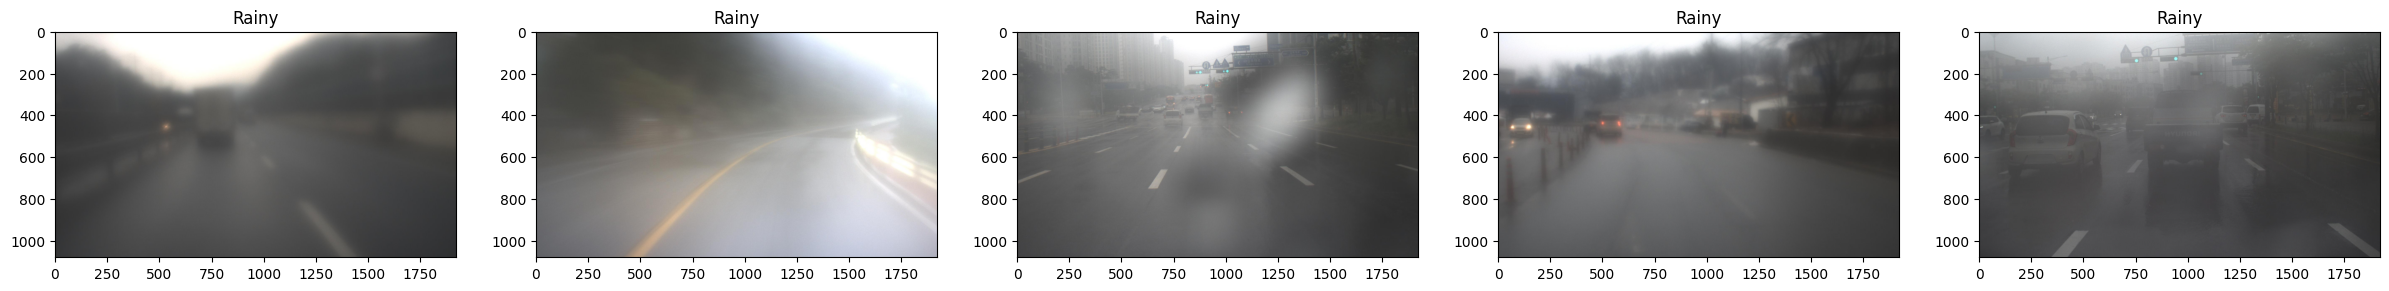

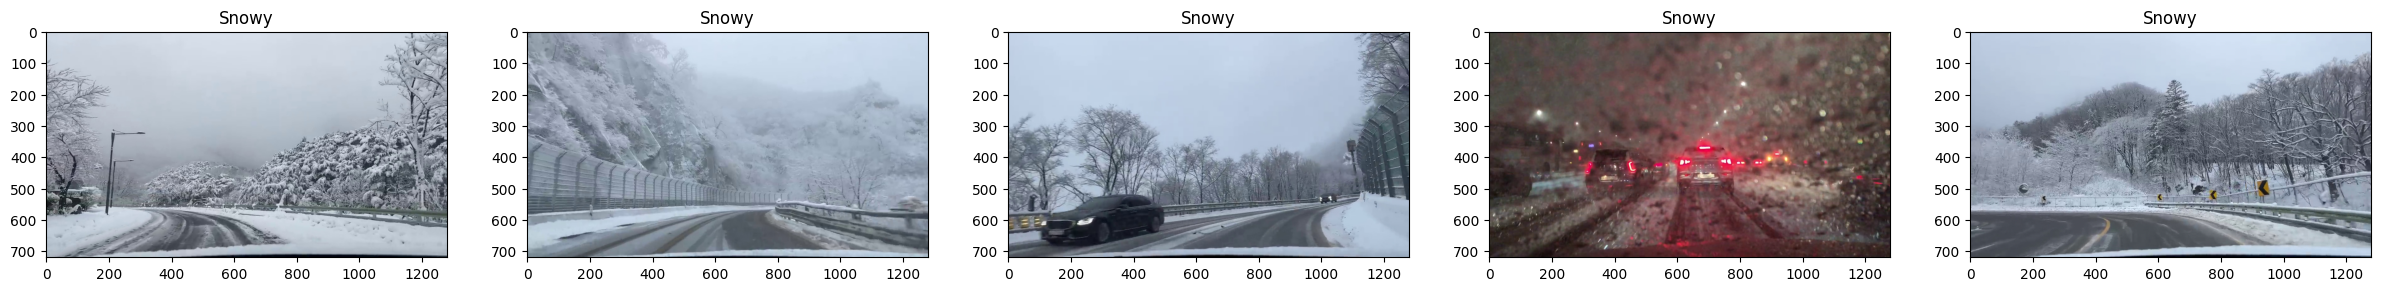

In [132]:
def img_show_aihub(AI_hub_images_path,class_names):

    rand_idx = np.random.randint(0,5000,5)
    for class_name in class_names:
        images_jpg = glob(AI_hub_images_path+class_name+"//*.jpg")
        plt.figure(figsize=(30,30))
        for i,idx in enumerate(rand_idx):
            img = Image.open(images_jpg[idx])
            img = np.array(img)

            plt.subplot(1,5,i+1)
            plt.imshow(img)
            plt.title(class_name)
        plt.show()

img_show_aihub(AI_hub_images_path,class_names)

* AI HUB 사진 : trasform - crop 활용하여 height 1/2 정도를 기준으로 잘라 DataLoader에 삽입

### 3) 데이터 통합

In [2]:
from glob import glob
import shutil
import os

youtube_images_path = 'D://Weather conditions driving classification data (YouTube)//images//'
AI_hub_images_path = 'D://Weather conditions driving classification data (AI hub)//images//'
all_images_path = 'D://Weather conditions driving classification data (All)//images//'
class_names = ['Normal','Rainy','Snowy']

for class_name in class_names:

    class_cnt = 0
    
    if not os.path.exists(all_images_path+class_name):
        os.makedirs(all_images_path+class_name)

    youtube_files = glob(youtube_images_path+class_name+'//*.jpg')
    # print(youtube_files)
    for youtube_file in youtube_files:
        class_cnt += 1
        shutil.move(youtube_file,all_images_path+class_name+'//frame'+str(class_cnt)+'.jpg')
    
    AI_hub_files = glob(AI_hub_images_path+class_name+'//*.jpg')
    # print(AI_hub_files)
    for AI_hub_file in AI_hub_files:
        class_cnt += 1
        shutil.move(AI_hub_file,all_images_path+class_name+'//frame'+str(class_cnt)+'.jpg')